In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24633 entries, 0 to 24632
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    24633 non-null  object 
 1   stato                                   24633 non-null  object 
 2   codice_regione                          24633 non-null  int64  
 3   denominazione_regione                   24633 non-null  object 
 4   lat                                     24633 non-null  float64
 5   long                                    24633 non-null  float64
 6   ricoverati_con_sintomi                  24633 non-null  int64  
 7   terapia_intensiva                       24633 non-null  int64  
 8   totale_ospedalizzati                    24633 non-null  int64  
 9   isolamento_domiciliare                  24633 non-null  int64  
 10  totale_positivi                         24633 non-null  in

In [3]:
import pandas as pd

df= pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24633 entries, 0 to 24632
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    24633 non-null  object 
 1   stato                                   24633 non-null  object 
 2   codice_regione                          24633 non-null  int64  
 3   denominazione_regione                   24633 non-null  object 
 4   lat                                     24633 non-null  float64
 5   long                                    24633 non-null  float64
 6   ricoverati_con_sintomi                  24633 non-null  int64  
 7   terapia_intensiva                       24633 non-null  int64  
 8   totale_ospedalizzati                    24633 non-null  int64  
 9   isolamento_domiciliare                  24633 non-null  int64  
 10  totale_positivi                         24633 non-null  in

In [4]:
df.drop_duplicates()

print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
24628    False
24629    False
24630    False
24631    False
24632    False
Length: 24633, dtype: bool


In [5]:
df1 = df.drop(columns=['stato','lat','long','ricoverati_con_sintomi','isolamento_domiciliare','variazione_totale_positivi','nuovi_positivi',
'dimessi_guariti','casi_da_sospetto_diagnostico','casi_da_screening','totale_casi','tamponi','casi_testati','note','ingressi_terapia_intensiva',
'note_test','note_casi','totale_positivi_test_molecolare', 'codice_regione','totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare', 'tamponi_test_antigenico_rapido','codice_nuts_1','codice_nuts_2'])

df1['data'] = pd.to_datetime(df1['data'])


df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24633 entries, 0 to 24632
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data                   24633 non-null  datetime64[ns]
 1   denominazione_regione  24633 non-null  object        
 2   terapia_intensiva      24633 non-null  int64         
 3   totale_ospedalizzati   24633 non-null  int64         
 4   totale_positivi        24633 non-null  int64         
 5   deceduti               24633 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB


In [6]:
df1['data'] = pd.to_datetime(df1['data'])
df1['data'] = df1['data'].dt.normalize()
df1['data'] = df1['data'].dt.floor('D')
df1.head(22)     

,data,denominazione_regione,terapia_intensiva,totale_ospedalizzati,totale_positivi,deceduti
0,2020-02-24,Abruzzo,0,0,0,0
1,2020-02-24,Basilicata,0,0,0,0
2,2020-02-24,Calabria,0,0,0,0
3,2020-02-24,Campania,0,0,0,0
4,2020-02-24,Emilia-Romagna,2,12,18,0
5,2020-02-24,Friuli Venezia Giulia,0,0,0,0
6,2020-02-24,Lazio,1,2,2,0
7,2020-02-24,Liguria,0,0,0,0
8,2020-02-24,Lombardia,19,95,166,6
9,2020-02-24,Marche,0,0,0,0


In [7]:
df1sort = df1.sort_values(by=["denominazione_regione","data"])

df1sort.head(10)

,data,denominazione_regione,terapia_intensiva,totale_ospedalizzati,totale_positivi,deceduti
0,2020-02-24,Abruzzo,0,0,0,0
21,2020-02-25,Abruzzo,0,0,0,0
42,2020-02-26,Abruzzo,0,0,0,0
63,2020-02-27,Abruzzo,0,1,1,0
84,2020-02-28,Abruzzo,0,1,1,0
105,2020-02-29,Abruzzo,0,2,2,0
126,2020-03-01,Abruzzo,0,3,5,0
147,2020-03-02,Abruzzo,0,3,5,0
168,2020-03-03,Abruzzo,0,5,6,0
189,2020-03-04,Abruzzo,0,7,7,0


In [8]:
df_new = df1sort.rename (columns={"data": "Date", "denominazione_regione" : "Region", "terapia_intensiva" : "ICU_Cases","totale_ospedalizzati" :"Hospitalized_Cases",
             "totale_positivi": "Confirmed_Cases","deceduti" : "Deaths" })

df_new.head(5)

,Date,Region,ICU_Cases,Hospitalized_Cases,Confirmed_Cases,Deaths
0,2020-02-24,Abruzzo,0,0,0,0
21,2020-02-25,Abruzzo,0,0,0,0
42,2020-02-26,Abruzzo,0,0,0,0
63,2020-02-27,Abruzzo,0,1,1,0
84,2020-02-28,Abruzzo,0,1,1,0


In [9]:
import math
import numpy as np

df_new["GR_ICU"] = (df_new["ICU_Cases"].diff())/df_new["ICU_Cases"]
df_new["GR_Hospitalised"] = (df_new["Hospitalized_Cases"].diff())/df_new["Hospitalized_Cases"]
df_new["GR_Confirmed"] = (df_new["Confirmed_Cases"].diff())/df_new["Confirmed_Cases"]
df_new["GR_Deaths"] = (df_new["Deaths"].diff())/df_new["Deaths"]


df_new["DT_ICU"] = np.log(2) / (np.log(1 + df_new['GR_ICU']))
df_new["DT_Hospitalised"] = np.log(2) / (np.log(1 + df_new['GR_Hospitalised']))
df_new["DT_Confirmed"] = np.log(2) / (np.log(1 + df_new['GR_Confirmed']))
df_new["DT_Deaths"] = np.log(2) / (np.log(1 + df_new['GR_Deaths']))



C:\Users\stude\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stude\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
df_new1 = df_new.fillna(0)
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24633 entries, 0 to 24632
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                24633 non-null  datetime64[ns]
 1   Region              24633 non-null  object        
 2   ICU_Cases           24633 non-null  int64         
 3   Hospitalized_Cases  24633 non-null  int64         
 4   Confirmed_Cases     24633 non-null  int64         
 5   Deaths              24633 non-null  int64         
 6   GR_ICU              24633 non-null  float64       
 7   GR_Hospitalised     24633 non-null  float64       
 8   GR_Confirmed        24633 non-null  float64       
 9   GR_Deaths           24633 non-null  float64       
 10  DT_ICU              24633 non-null  float64       
 11  DT_Hospitalised     24633 non-null  float64       
 12  DT_Confirmed        24633 non-null  float64       
 13  DT_Deaths           24633 non-null  float64   

In [11]:
# removing dates

dfCOVID1 = df_new1[~(df_new1['Date'] > '2022-05-31')]

dfCOVID1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17388 entries, 0 to 17387
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                17388 non-null  datetime64[ns]
 1   Region              17388 non-null  object        
 2   ICU_Cases           17388 non-null  int64         
 3   Hospitalized_Cases  17388 non-null  int64         
 4   Confirmed_Cases     17388 non-null  int64         
 5   Deaths              17388 non-null  int64         
 6   GR_ICU              17388 non-null  float64       
 7   GR_Hospitalised     17388 non-null  float64       
 8   GR_Confirmed        17388 non-null  float64       
 9   GR_Deaths           17388 non-null  float64       
 10  DT_ICU              17388 non-null  float64       
 11  DT_Hospitalised     17388 non-null  float64       
 12  DT_Confirmed        17388 non-null  float64       
 13  DT_Deaths           17388 non-null  float64   

In [12]:
dfCOVID1.tail()
dfCOVID_replaced = dfCOVID1.replace('Piemonte','Piedmont')
dfCOVID_replaced1 = dfCOVID_replaced.replace('Aosta Valley','Aosta')
dfCOVID_replaced2 = dfCOVID_replaced1.replace('Valle d Aosta','Aosta')
dfCOVID_replaced3 = dfCOVID_replaced2.replace('Friuli-Venezia Giulia','Friuli_Venezia_Giulia')
dfCOVID_replaced4 = dfCOVID_replaced3.replace('Emilia-Romagna','Emilia_Romagna')
dfCOVID_replaced5 = dfCOVID_replaced4.replace('Toscana','Tuscany')
dfCOVID_replaced6 = dfCOVID_replaced5.replace('Sicilia','Sicily')
dfCOVID_replaced7 = dfCOVID_replaced6.replace('Sardegna','Sardinia')
dfCOVID_replaced8 = dfCOVID_replaced7.replace('PA Bolzano','Bolzano')
dfCOVID_replaced9 = dfCOVID_replaced8.replace('P.A. Bolzano','Bolzano')
dfCOVID_replaced10 = dfCOVID_replaced9.replace('PA Trento','Trento')
dfCOVID = dfCOVID_replaced10.replace('P.A. Trento','Trento')

print(dfCOVID)

            Date   Region  ICU_Cases  Hospitalized_Cases  Confirmed_Cases  \
0     2020-02-24  Abruzzo          0                   0                0   
21    2020-02-25  Abruzzo          0                   0                0   
42    2020-02-26  Abruzzo          0                   0                0   
63    2020-02-27  Abruzzo          0                   1                1   
84    2020-02-28  Abruzzo          0                   1                1   
...          ...      ...        ...                 ...              ...   
17303 2022-05-27   Veneto         17                 306            30901   
17324 2022-05-28   Veneto         14                 286            29772   
17345 2022-05-29   Veneto         15                 276            28873   
17366 2022-05-30   Veneto         13                 268            28430   
17387 2022-05-31   Veneto         12                 255            27369   

       Deaths    GR_ICU  GR_Hospitalised  GR_Confirmed  GR_Deaths     DT_IC

In [13]:
#IMPORTING MOBILTY DATA##############  1

import pandas as pd
import pandas as pd
import os, csv, sys

mob20 = pd.read_csv(r"C:\Users\stude\OneDrive\Desktop\2020_IT_Region_Mobility_Report1.csv")
mob21 = pd.read_csv(r"C:\Users\stude\OneDrive\Desktop\2021_IT_Region_Mobility_Report1.csv")
mob22 = pd.read_csv(r"C:\Users\stude\OneDrive\Desktop\2022_IT_Region_Mobility_Report1.csv")
dfmob20 = pd.DataFrame(mob20)
dfmob21 = pd.DataFrame(mob21)
dfmob22 = pd.DataFrame(mob22)
moball = pd.concat([dfmob20, dfmob21,dfmob22], axis=0, ignore_index=True)

moball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123695 entries, 0 to 123694
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 123695 non-null  object 
 1   country_region                                      123695 non-null  object 
 2   sub_region_1                                        122721 non-null  object 
 3   sub_region_2                                        103241 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     122721 non-null  object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            123695 non-null  object 
 8   date                                                123695 non-n

In [14]:
############## 2

moball['date'] = pd.to_datetime(moball['date'])

##############     RENAMING COLUMNS     ############

moball = moball.rename (columns={"date": "Date", "sub_region_1" : "Region", 'grocery_and_pharmacy_percent_change_from_baseline' : 'Grocery_Pharmacy','parks_percent_change_from_baseline' : 'Parks', 'transit_stations_percent_change_from_baseline': 'Transit', 'workplaces_percent_change_from_baseline' : 'Workplaces', 'residential_percent_change_from_baseline' : 'Residential'  })


In [15]:

#############    REMOVING DATES   #################

moball1 = moball[~(moball['Date'] > '2022-05-31')]
moball2 = moball1[~(moball1['Date'] < '2020-02-24')]

moball2.info()

moball2.tail()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 105153 entries, 9 to 123557
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 105153 non-null  object        
 1   country_region                                      105153 non-null  object        
 2   Region                                              104325 non-null  object        
 3   sub_region_2                                        87765 non-null   object        
 4   metro_area                                          0 non-null       float64       
 5   iso_3166_2_code                                     104325 non-null  object        
 6   census_fips_code                                    0 non-null       float64       
 7   place_id                                            105153 non-null  object        

,country_region_code,country_region,Region,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,Date,retail_and_recreation_percent_change_from_baseline,Grocery_Pharmacy,Parks,Transit,Workplaces,Residential
123553,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2022-05-27,-3.0,9.0,87.0,-1.0,-4.0,0.0
123554,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2022-05-28,-15.0,-3.0,21.0,-6.0,-7.0,2.0
123555,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2022-05-29,-16.0,-1.0,10.0,21.0,-1.0,2.0
123556,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2022-05-30,-7.0,7.0,62.0,-3.0,-5.0,1.0
123557,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2022-05-31,0.0,11.0,79.0,-4.0,-4.0,0.0


In [20]:
############# Indivivual strings ###############   3


df1 = moball2[~moball2.stack().str.contains('Province of').any(level=0)]

#df2 = df1[~df1.stack().str.contains('Trentino-South Tyrol').any(level=0)]

df3 = df1[~df1.stack().str.contains('Free municipal consortium of').any(level=0)]

df4 = df3[~df3.stack().str.contains('South Sardinia').any(level=0)]

df5 = df4[~df4.stack().str.contains('Metropolitan City of').any(level=0)]

dfmobi = df5[~df5.stack().str.contains('ChIJA9KNRIL-1BIRb15jJFz1LOI').any(level=0)]

dfmobi['Workplaces'] = dfmobi['Workplaces'].fillna(0)
dfmobi['Grocery_Pharmacy'] = dfmobi['Grocery_Pharmacy'].fillna(0)
dfmobi['Parks'] = dfmobi['Parks'].fillna(0)
dfmobi['Residential'] = dfmobi['Residential'].fillna(0)
dfmobi['Transit'] = dfmobi['Transit'].fillna(0)
dfmobi['retail_and_recreation_percent_change_from_baseline'] = dfmobi['retail_and_recreation_percent_change_from_baseline'].fillna(0)

dfmobi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17388 entries, 330 to 121541
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 17388 non-null  object        
 1   country_region                                      17388 non-null  object        
 2   Region                                              17388 non-null  object        
 3   sub_region_2                                        828 non-null    object        
 4   metro_area                                          0 non-null      float64       
 5   iso_3166_2_code                                     17388 non-null  object        
 6   census_fips_code                                    0 non-null      float64       
 7   place_id                                            17388 non-null  object        
 8   Dat

<ipython-input-20-7cfe77879064>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmobi['Workplaces'] = dfmobi['Workplaces'].fillna(0)
<ipython-input-20-7cfe77879064>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmobi['Grocery_Pharmacy'] = dfmobi['Grocery_Pharmacy'].fillna(0)
<ipython-input-20-7cfe77879064>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [21]:

dfmobi = dfmobi.rename (columns={ 'retail_and_recreation_percent_change_from_baseline' : 'Retail' })


##### REMOVING UNNECESSARY COLUMNS##### 4

dfmobi = dfmobi.drop(columns=['country_region_code','country_region','sub_region_2','metro_area','iso_3166_2_code',
                        'census_fips_code','place_id'])
dfmobi.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17388 entries, 330 to 121541
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            17388 non-null  object        
 1   Date              17388 non-null  datetime64[ns]
 2   Retail            17388 non-null  float64       
 3   Grocery_Pharmacy  17388 non-null  float64       
 4   Parks             17388 non-null  float64       
 5   Transit           17388 non-null  float64       
 6   Workplaces        17388 non-null  float64       
 7   Residential       17388 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.2+ MB


In [22]:
############   5

dfmobi.drop_duplicates() 

dfmobi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17388 entries, 330 to 121541
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            17388 non-null  object        
 1   Date              17388 non-null  datetime64[ns]
 2   Retail            17388 non-null  float64       
 3   Grocery_Pharmacy  17388 non-null  float64       
 4   Parks             17388 non-null  float64       
 5   Transit           17388 non-null  float64       
 6   Workplaces        17388 non-null  float64       
 7   Residential       17388 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.2+ MB


In [23]:
######   CALUCULATE CMI   ##### 6

dfmobilCMI = dfmobi.assign(

CMI = dfmobi.mean(axis=1, numeric_only=True))

dfmobilCMI.head()


,Region,Date,Retail,Grocery_Pharmacy,Parks,Transit,Workplaces,Residential,CMI
330,Abruzzo,2020-02-24,5.0,19.0,25.0,2.0,-10.0,1.0,7.000000
331,Abruzzo,2020-02-25,4.0,7.0,50.0,-3.0,-15.0,3.0,7.666667
332,Abruzzo,2020-02-26,-5.0,1.0,-10.0,-11.0,-3.0,2.0,-4.333333
333,Abruzzo,2020-02-27,-3.0,3.0,-1.0,-8.0,0.0,2.0,-1.166667
334,Abruzzo,2020-02-28,-3.0,2.0,-3.0,-11.0,-1.0,2.0,-2.333333


In [24]:
####################      7

dfmobilCMI_replaced1 = dfmobilCMI.replace('Emilia-Romagna','Emilia_Romagna')

dfmobilCMI_replaced2 = dfmobilCMI_replaced1.replace('Friuli-Venezia Giulia','Friuli_Venezia_Giulia')

dfmobilCMI_replaced3 = dfmobilCMI_replaced2.replace('Lombardy','Lombardia')

dfMOBILITY = dfmobilCMI_replaced3.replace('Apulia','Puglia')

dfMOBILITYFULL = dfMOBILITY.sort_values(by=["Region","Date"])

dfMOBILITYFULL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17388 entries, 330 to 121541
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            17388 non-null  object        
 1   Date              17388 non-null  datetime64[ns]
 2   Retail            17388 non-null  float64       
 3   Grocery_Pharmacy  17388 non-null  float64       
 4   Parks             17388 non-null  float64       
 5   Transit           17388 non-null  float64       
 6   Workplaces        17388 non-null  float64       
 7   Residential       17388 non-null  float64       
 8   CMI               17388 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.3+ MB


In [25]:
dfMOBILITYFULL['Deaths'] = dfCOVID['Deaths']

dfMOBILITYFULL.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17388 entries, 330 to 121541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            17388 non-null  object        
 1   Date              17388 non-null  datetime64[ns]
 2   Retail            17388 non-null  float64       
 3   Grocery_Pharmacy  17388 non-null  float64       
 4   Parks             17388 non-null  float64       
 5   Transit           17388 non-null  float64       
 6   Workplaces        17388 non-null  float64       
 7   Residential       17388 non-null  float64       
 8   CMI               17388 non-null  float64       
 9   Deaths            3120 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 1.5+ MB


In [26]:


#ITALIA = dfMOBILITYFULL.append(dfCOVID)

#ITALIA = dfMOBILITYFULL.append(dfCOVID, ignore_index=True)

#ITALIA = pd.concat([dfMOBILITYFULL, dfCOVID], ignore_index=True, sort=False)

#ITALIA1  = pd.concat([dfMOBILITYFULL, dfCOVID],axis = 1,  join='inner')


#ITALIA2 = pd.concat([dfMOBILITYFULL, dfCOVID.merge(dfMOBILITYFULL[['Date','Region','Retail','Grocery_Pharmacy','Parks','Transit','Workplaces','Residential']], how='left', on='Date')],sort=False)

#ITALIA3 = pd.concat([dfMOBILITYFULL, dfCOVID],             # Append two pandas DataFrames
                      #ignore_index = True,
                      #sort = False)
ITALIA4 = pd.merge(dfMOBILITYFULL,                   # Inner join
                       dfCOVID,
                      on = "Date")
ITALIA4.drop_duplicates() 

ITALIA4.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 365148 entries, 0 to 365147
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Region_x            365148 non-null  object        
 1   Date                365148 non-null  datetime64[ns]
 2   Retail              365148 non-null  float64       
 3   Grocery_Pharmacy    365148 non-null  float64       
 4   Parks               365148 non-null  float64       
 5   Transit             365148 non-null  float64       
 6   Workplaces          365148 non-null  float64       
 7   Residential         365148 non-null  float64       
 8   CMI                 365148 non-null  float64       
 9   Deaths_x            65520 non-null   float64       
 10  Region_y            365148 non-null  object        
 11  ICU_Cases           365148 non-null  int64         
 12  Hospitalized_Cases  365148 non-null  int64         
 13  Confirmed_Cases     365148 no

In [27]:
#### MERGE both MOBILITY AND COVID dataframes ############### 8

ITALIA1 = pd.merge(dfMOBILITY, dfCOVID, how='inner', on = 'Date')

ITALIA1_date = ITALIA1.drop(columns= ['Region_x','Region_y'])

ITALIA2 = pd.merge(dfMOBILITY, dfCOVID, how='inner', on = 'Region')

ITALIA2_region = ITALIA2.drop(columns= ['Date_x','Date_y'])

ITALIA = pd.concat([ITALIA1_date,ITALIA2_region], axis=0)

ITALIA.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12705660 entries, 0 to 12340511
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Date                datetime64[ns]
 1   Retail              float64       
 2   Grocery_Pharmacy    float64       
 3   Parks               float64       
 4   Transit             float64       
 5   Workplaces          float64       
 6   Residential         float64       
 7   CMI                 float64       
 8   ICU_Cases           int64         
 9   Hospitalized_Cases  int64         
 10  Confirmed_Cases     int64         
 11  Deaths              int64         
 12  GR_ICU              float64       
 13  GR_Hospitalised     float64       
 14  GR_Confirmed        float64       
 15  GR_Deaths           float64       
 16  DT_ICU              float64       
 17  DT_Hospitalised     float64       
 18  DT_Confirmed        float64       
 19  DT_Deaths           float64       
 20  

In [32]:


df= pd.DataFrame(ITALIA)

df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12705660 entries, 0 to 12340511
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Date                datetime64[ns]
 1   Retail              float64       
 2   Grocery_Pharmacy    float64       
 3   Parks               float64       
 4   Transit             float64       
 5   Workplaces          float64       
 6   Residential         float64       
 7   CMI                 float64       
 8   ICU_Cases           int64         
 9   Hospitalized_Cases  int64         
 10  Confirmed_Cases     int64         
 11  Deaths              int64         
 12  GR_ICU              float64       
 13  GR_Hospitalised     float64       
 14  GR_Confirmed        float64       
 15  GR_Deaths           float64       
 16  DT_ICU              float64       
 17  DT_Hospitalised     float64       
 18  DT_Confirmed        float64       
 19  DT_Deaths           float64       
 20  

In [37]:
import datetime

#ITALIA_NPI = df[df['Date'].dt.strftime('%Y-%m-%d') == "2020-02-26", ]

ITALIA_1 = df.loc[(df['Date'] == '2020-02-26') ]
ITALIA_2 = df.loc[(df['Date'] == '2020-03-12') ]
ITALIA_3 = df.loc[(df['Date'] == '2020-03-14') ]
ITALIA_4 = df.loc[(df['Date'] == '2020-03-25') ]
ITALIA_5 = df.loc[(df['Date'] == '2020-05-09') ]
ITALIA_6 = df.loc[(df['Date'] == '2020-05-21') ]
ITALIA_7 = df.loc[(df['Date'] == '2020-05-28') ]
ITALIA_8 = df.loc[(df['Date'] == '2020-06-06') ]
ITALIA_9 = df.loc[(df['Date'] == '2020-06-14') ]
ITALIA_10 = df.loc[(df['Date'] == '2020-06-15') ]
ITALIA_11 = df.loc[(df['Date'] == '2020-08-18') ]
ITALIA_12 = df.loc[(df['Date'] == '2020-10-16') ]
ITALIA_13 = df.loc[(df['Date'] == '2020-12-05') ]
ITALIA_14 = df.loc[(df['Date'] == '2021-01-14') ]
ITALIA_15 = df.loc[(df['Date'] == '2021-01-17') ]
ITALIA_16 = df.loc[(df['Date'] == '2021-03-05') ]
ITALIA_17 = df.loc[(df['Date'] == '2021-03-18') ]
ITALIA_18 = df.loc[(df['Date'] == '2021-09-04') ]
ITALIA_19 = df.loc[(df['Date'] == '2021-11-29') ]
ITALIA_20 = df.loc[(df['Date'] == '2021-12-09') ]
ITALIA_21 = df.loc[(df['Date'] == '2022-01-02') ]
ITALIA_22 = df.loc[(df['Date'] == '2022-03-27') ]
ITALIA_23 = df.loc[(df['Date'] == '2022-05-04') ]


df1= pd.DataFrame(ITALIA_1)
df2 = pd.DataFrame(ITALIA_2)
df3= pd.DataFrame(ITALIA_3)
df4= pd.DataFrame(ITALIA_4)
df5= pd.DataFrame(ITALIA_5)
df6= pd.DataFrame(ITALIA_6)
df7= pd.DataFrame(ITALIA_7)
df8= pd.DataFrame(ITALIA_8)
df9= pd.DataFrame(ITALIA_9)
df10= pd.DataFrame(ITALIA_10)
df11= pd.DataFrame(ITALIA_11)
df12= pd.DataFrame(ITALIA_12)
df13= pd.DataFrame(ITALIA_13)
df14= pd.DataFrame(ITALIA_14)
df15= pd.DataFrame(ITALIA_15)
df16= pd.DataFrame(ITALIA_16)
df17= pd.DataFrame(ITALIA_17)
df18= pd.DataFrame(ITALIA_18)
df19= pd.DataFrame(ITALIA_19)
df20= pd.DataFrame(ITALIA_20)
df21= pd.DataFrame(ITALIA_21)
df22= pd.DataFrame(ITALIA_22)
df23= pd.DataFrame(ITALIA_23)


dfdates = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]

ITALIA_NPI = pd.concat(dfdates)

ITALIA_NPI.info()
ITALIA_NPI.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10143 entries, 882 to 353240
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                10143 non-null  datetime64[ns]
 1   Retail              10143 non-null  float64       
 2   Grocery_Pharmacy    10143 non-null  float64       
 3   Parks               10143 non-null  float64       
 4   Transit             10143 non-null  float64       
 5   Workplaces          10143 non-null  float64       
 6   Residential         10143 non-null  float64       
 7   CMI                 10143 non-null  float64       
 8   ICU_Cases           10143 non-null  int64         
 9   Hospitalized_Cases  10143 non-null  int64         
 10  Confirmed_Cases     10143 non-null  int64         
 11  Deaths              10143 non-null  int64         
 12  GR_ICU              10143 non-null  float64       
 13  GR_Hospitalised     10143 non-null  float64

,Date,Retail,Grocery_Pharmacy,Parks,Transit,Workplaces,Residential,CMI,ICU_Cases,Hospitalized_Cases,...,Deaths,GR_ICU,GR_Hospitalised,GR_Confirmed,GR_Deaths,DT_ICU,DT_Hospitalised,DT_Confirmed,DT_Deaths,Region
882,2020-02-26,-5.0,1.0,-10.0,-11.0,-3.0,2.0,-4.333333,0,0,...,0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,NaN
883,2020-02-26,-5.0,1.0,-10.0,-11.0,-3.0,2.0,-4.333333,0,0,...,0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,NaN
884,2020-02-26,-5.0,1.0,-10.0,-11.0,-3.0,2.0,-4.333333,0,0,...,0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,NaN
885,2020-02-26,-5.0,1.0,-10.0,-11.0,-3.0,2.0,-4.333333,0,0,...,0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,NaN
886,2020-02-26,-5.0,1.0,-10.0,-11.0,-3.0,2.0,-4.333333,3,23,...,1,0.333333,0.26087,0.434783,1.0,2.409421,2.99026,1.920004,1.0,NaN


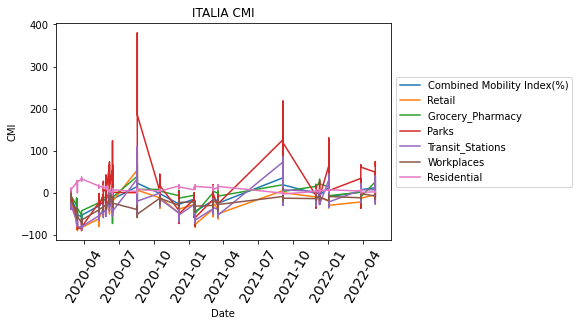

<Figure size 480x1080 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

x = ITALIA_NPI['Date']
y = ITALIA_NPI['CMI']
y1 = ITALIA_NPI['Retail']
y2 = ITALIA_NPI['Grocery_Pharmacy']
y3 = ITALIA_NPI['Parks']
y4 = ITALIA_NPI['Transit']
y5 = ITALIA_NPI['Workplaces']
y6 = ITALIA_NPI['Residential']
fig,ax1 = plt.subplots()

ax1.plot(x, y, label = 'Combined Mobility Index(%)')
ax1.plot(x, y1, label = 'Retail')
ax1.plot(x, y2, label = 'Grocery_Pharmacy ')
ax1.plot(x, y3, label = 'Parks')
ax1.plot(x, y4, label = 'Transit_Stations ')
ax1.plot(x, y5, label = 'Workplaces')
ax1.plot(x, y6, label = 'Residential')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.tick_params(axis='x', labelsize=14 , labelrotation = 60 )
plt.xlabel("Date")
plt.ylabel("CMI")

plt.title("ITALIA CMI")

plt.figure(figsize=(4, 9),dpi = 120)

 
plt.show()

In [36]:
import matplotlib.pyplot as plt

x = ITALIA_NPI['Date']
y = ITALIA_NPI['CMI']
y1 = ITALIA_NPI['Region' == 'Abruzzo']

fig,ax1 = plt.subplots()

ax1.plot(x, y, label = 'Combined Mobility Index(%)')
ax1.plot(x, y1, label = 'Region')

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.tick_params(axis='x', labelsize=14 , labelrotation = 60 )
plt.xlabel("Date")
plt.ylabel("CMI")

plt.title("ITALIA CMI")

plt.figure(figsize=(4, 9),dpi = 120)

 
plt.show()

KeyError: False

In [80]:
Abruzzo = df.loc[(df['Region'] == 'Abruzzo') ]
Aosta = df.loc[(df['Region'] == 'Aosta') ]
Basilicata = df.loc[(df['Region'] == 'Basilicata') ]
Campania = df.loc[(df['Region'] == 'Campania') ]
Calabria = df.loc[(df['Region'] == 'Calabria') ]
Emilia_Romagna = df.loc[(df['Region'] == 'Emilia_Romagna') ]
Friuli_Venezia_Giulia = df.loc[(df['Region'] == 'Friuli_Venezia_Giulia') ]
Lazio = df.loc[(df['Region'] == 'Lazio') ]
Liguria = df.loc[(df['Region'] == 'Liguria') ]
Lombardia = df.loc[(df['Region'] == 'Lombardia') ]
Marche = df.loc[(df['Region'] == 'Marche') ]
Molise = df.loc[(df['Region'] == 'Molise') ]
Bolzano = df.loc[(df['Region'] == 'Bolzano') ]
Trento = df.loc[(df['Region'] == 'Trento') ]
Veneto = df.loc[(df['Region'] == 'Veneto') ]
Umbria = df.loc[(df['Region'] == 'Umbria') ]
Piedmont = df.loc[(df['Region'] == 'Piedmont') ]
Puglia = df.loc[(df['Region'] == 'Puglia') ]
Tuscany = df.loc[(df['Region'] == 'Tuscany') ]
Sicily = df.loc[(df['Region'] == 'Sicily') ]
Sardinia = df.loc[(df['Region'] == 'Sardinia') ]

Abruzzo1= pd.DataFrame(Abruzzo)
Aosta1= pd.DataFrame(Aosta)
Basilicata1= pd.DataFrame(Basilicata)
Campania1= pd.DataFrame(Campania)
Calabria1= pd.DataFrame(Calabria)
Emilia_Romagna1= pd.DataFrame(Emilia_Romagna)
Friuli_Venezia_Giulia1= pd.DataFrame(Friuli_Venezia_Giulia)
Lazio1= pd.DataFrame(Lazio)
Liguria1= pd.DataFrame(Liguria)
Lombardia1= pd.DataFrame(Lombardia)
Marche1= pd.DataFrame(Marche)
Molise1= pd.DataFrame(Molise)
Bolzano1= pd.DataFrame(Bolzano)
Trento1= pd.DataFrame(Trento)
Veneto1= pd.DataFrame(Veneto)
Umbria1= pd.DataFrame(Umbria)
Piedmont1= pd.DataFrame(Piedmont)
Puglia1= pd.DataFrame(Puglia)
Tuscany1= pd.DataFrame(Tuscany)
Sicily1= pd.DataFrame(Sicily)
Sardinia1= pd.DataFrame(Sardinia)

Regions = [Abruzzo1,
Aosta1,
Basilicata1,
Calabria1,
Campania1,
Emilia_Romagna1,
Friuli_Venezia_Giulia1,
Lazio1,
Liguria1,
Lombardia1,
Marche1,
Molise1,
Piedmont1,
Puglia1,
Sardinia1,
Sicily1,
Trento1,
Bolzano1,
Tuscany1,
Umbria1,
Veneto1
]

ITALIA_Regions = pd.concat(Regions)

ITALIA_Regions.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16560 entries, 0 to 17387
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Region              16560 non-null  object        
 1   Date                16560 non-null  datetime64[ns]
 2   Retail              16560 non-null  int64         
 3   Grocery_Pharmacy    16560 non-null  int64         
 4   Parks               16560 non-null  int64         
 5   Transit             16560 non-null  int64         
 6   Workplaces          16560 non-null  int64         
 7   Residential         16560 non-null  int64         
 8   CMI                 16560 non-null  float64       
 9   ICU_Cases           16560 non-null  int64         
 10  Hospitalized_Cases  16560 non-null  int64         
 11  Confirmed_Cases     16560 non-null  int64         
 12  Deaths              16560 non-null  int64         
 13  GR_ICU              16560 non-null  object    

In [27]:
ITALIA_NPI = ITALIA.loc[(ITALIA['Date'] == '2020-02-26' & ['Date'] == '2020-02-28')]

ITALIA_NPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 882 to 1322
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                441 non-null    datetime64[ns]
 1   Retail              441 non-null    float64       
 2   Grocery_Pharmacy    441 non-null    float64       
 3   Parks               441 non-null    float64       
 4   Transit             441 non-null    float64       
 5   Workplaces          441 non-null    float64       
 6   Residential         441 non-null    float64       
 7   CMI                 441 non-null    float64       
 8   ICU_Cases           441 non-null    int64         
 9   Hospitalized_Cases  441 non-null    int64         
 10  Confirmed_Cases     441 non-null    int64         
 11  Deaths              441 non-null    int64         
 12  GR_ICU              441 non-null    float64       
 13  GR_Hospitalised     441 non-null    float64    

In [81]:
ITALIA_Regions.to_csv(r"C:\Users\stude\OneDrive\Desktop\export_Regionsdataframe.csv", index=False)
